# Commodities EDA - Advanced Data Science Project

## YFinance Commodities Visualized

Fetching 10-year historical data from Yahoo Finance...


C:\Users\logan\AppData\Local\Temp\ipykernel_18592\4006797526.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, period="10y")['Close']
[*********************100%***********************]  25 of 25 completed


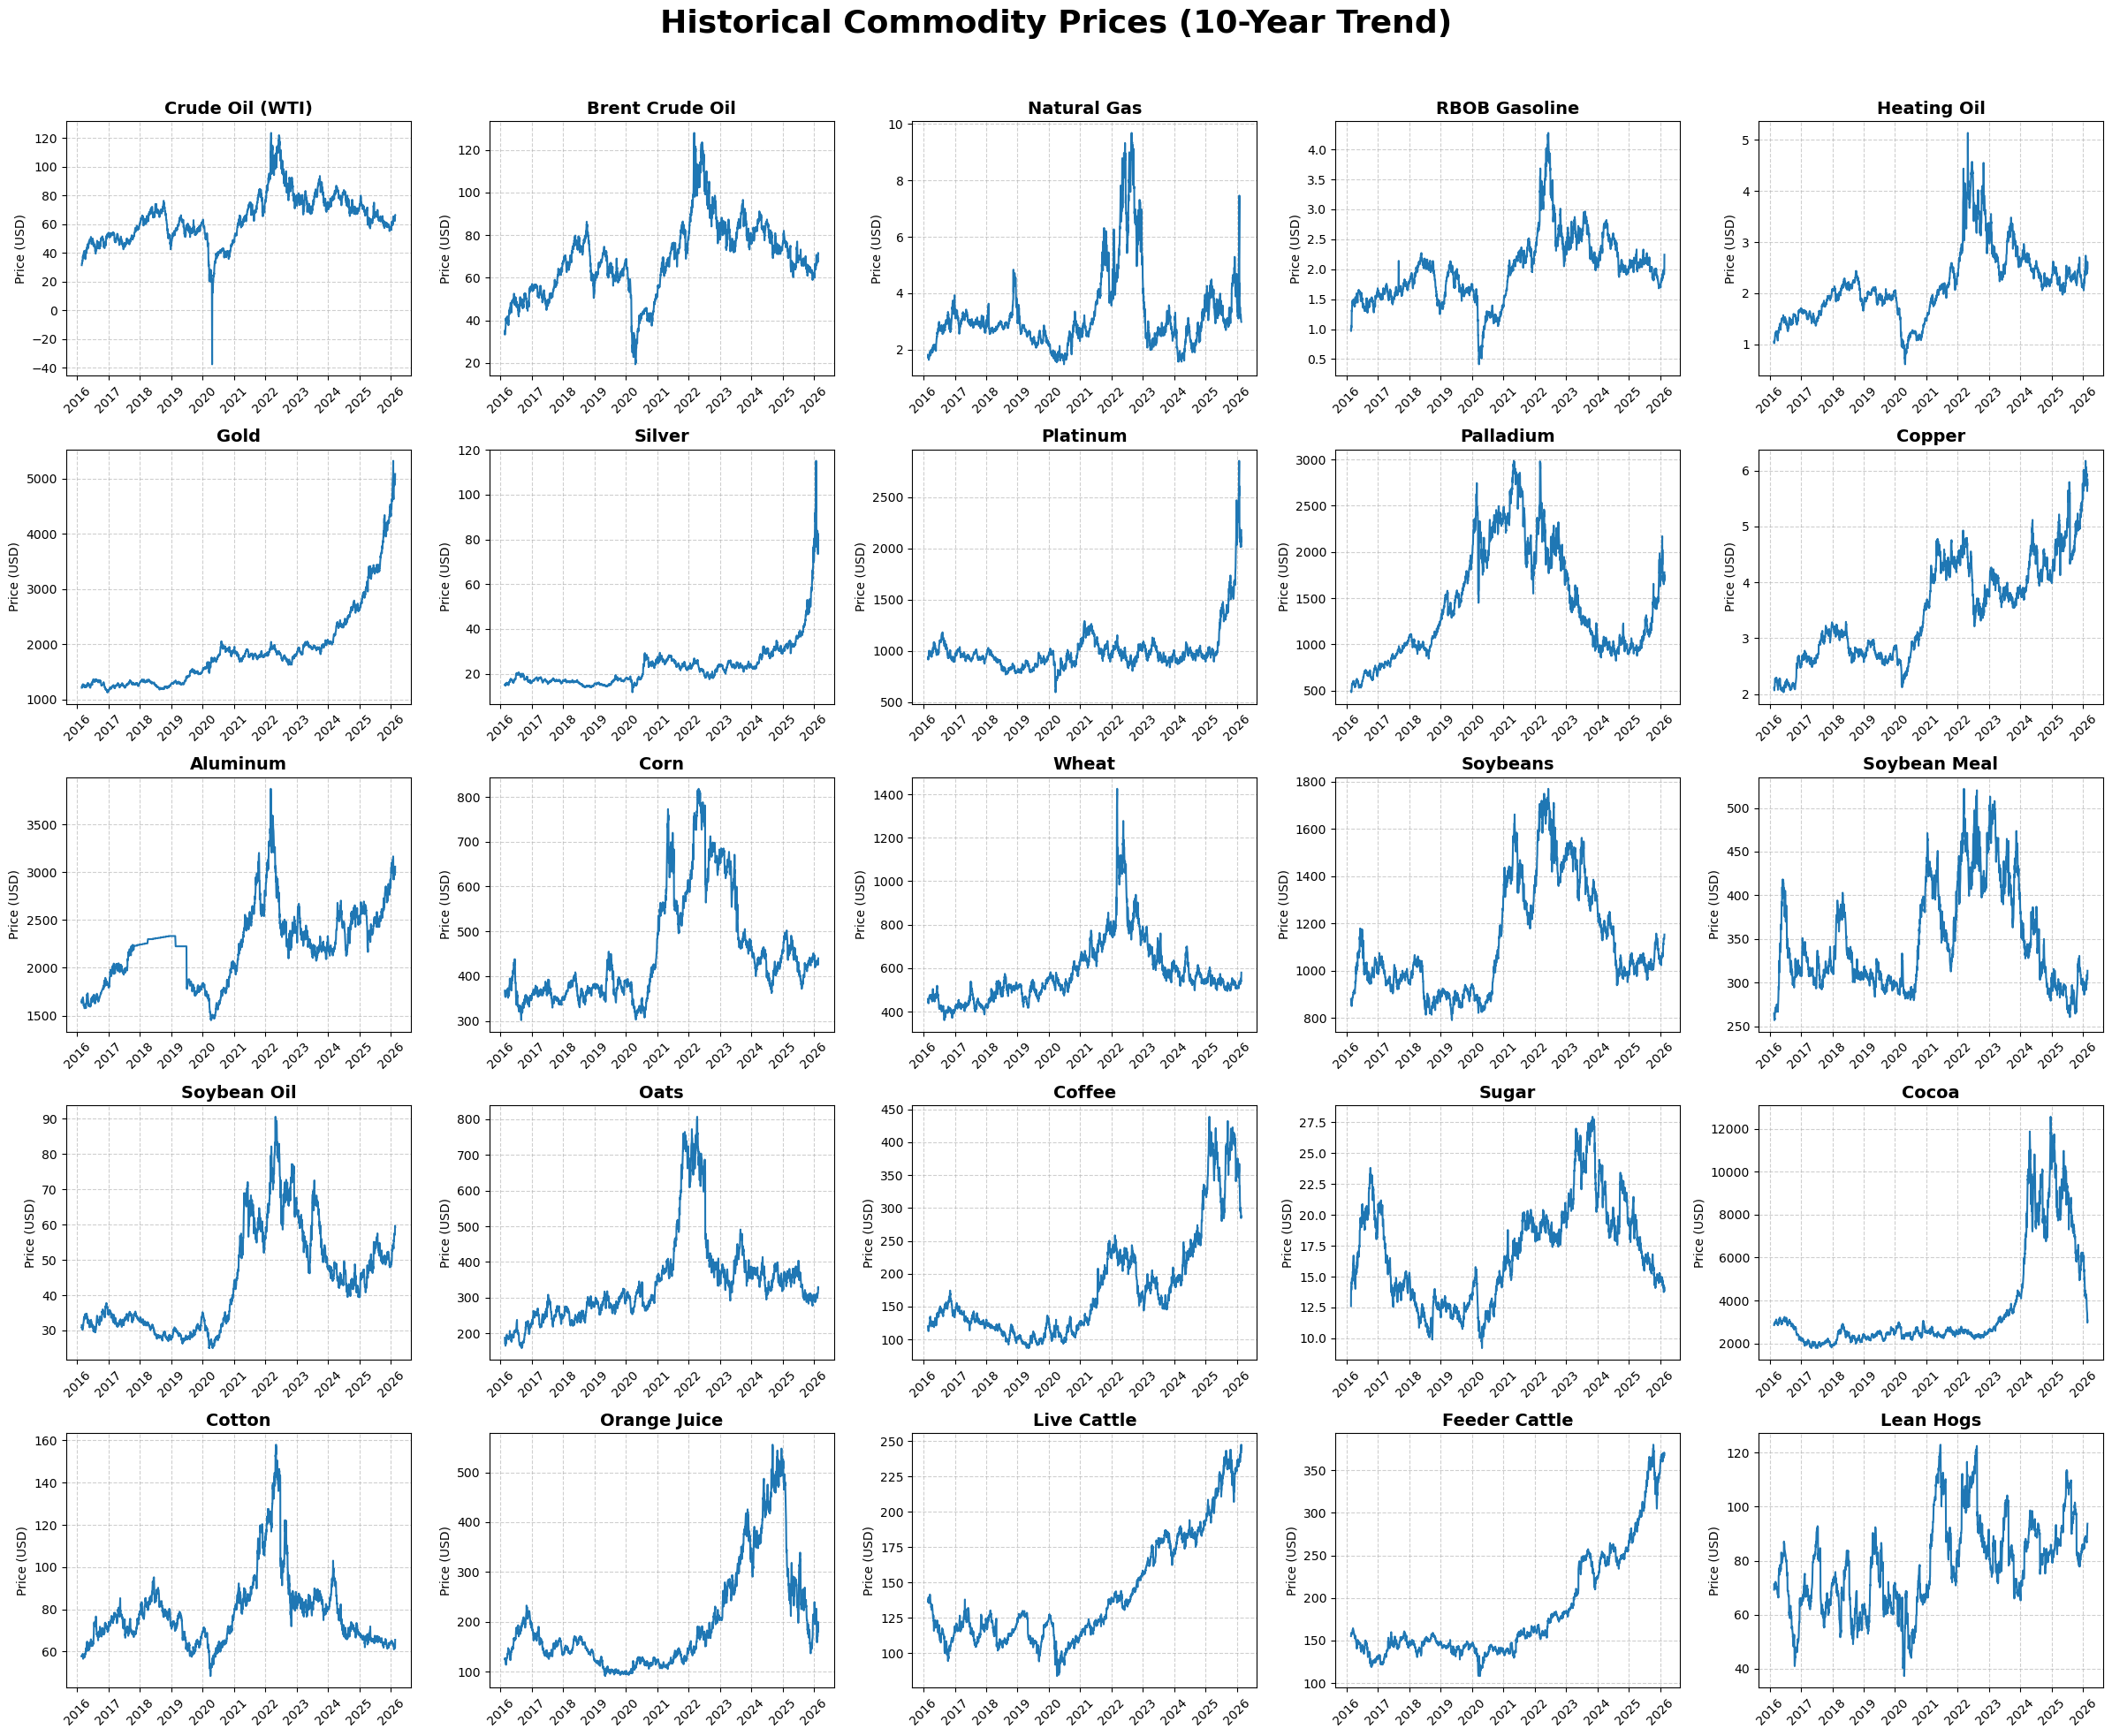

In [8]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# 1. Define the complete dictionary of commodities
commodities = {
    'CL=F': 'Crude Oil (WTI)', 'BZ=F': 'Brent Crude Oil', 'NG=F': 'Natural Gas',
    'RB=F': 'RBOB Gasoline', 'HO=F': 'Heating Oil', 'GC=F': 'Gold',
    'SI=F': 'Silver', 'PL=F': 'Platinum', 'PA=F': 'Palladium', 'HG=F': 'Copper',
    'ALI=F': 'Aluminum', 'ZC=F': 'Corn', 'ZW=F': 'Wheat', 'ZS=F': 'Soybeans',
    'ZM=F': 'Soybean Meal', 'ZL=F': 'Soybean Oil', 'ZO=F': 'Oats',
    'KC=F': 'Coffee', 'SB=F': 'Sugar', 'CC=F': 'Cocoa', 'CT=F': 'Cotton',
    'OJ=F': 'Orange Juice', 'LE=F': 'Live Cattle', 'GF=F': 'Feeder Cattle',
    'HE=F': 'Lean Hogs'
}

tickers = list(commodities.keys())

# 2. Fetch historical data for all 25 commodities
print("Fetching 10-year historical data from Yahoo Finance...")
df = yf.download(tickers, period="10y")['Close']

# 3. Set up a 5x5 grid of subplots
# Using a very large figure size so the 25 plots have room to breathe
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(24, 20))
fig.suptitle('Historical Commodity Prices (10-Year Trend)', fontsize=26, fontweight='bold', y=0.98)

# Flatten the 5x5 matrix of axes into a 1D array to easily loop over
axes = axes.flatten()

# 4. Loop and Plot
for i, ticker in enumerate(tickers):
    ax = axes[i]
    
    # Check if the ticker data exists and drop NA values
    if ticker in df.columns:
        ticker_data = df[ticker].dropna()
        
        if not ticker_data.empty:
            ax.plot(ticker_data.index, ticker_data.values, color='tab:blue', linewidth=1.5)
            ax.set_title(commodities[ticker], fontsize=14, fontweight='bold')
            ax.set_ylabel('Price (USD)')
            ax.grid(True, linestyle='--', alpha=0.6)
            ax.tick_params(axis='x', rotation=45)
        else:
            ax.text(0.5, 0.5, "No Data", ha='center', va='center', fontsize=12)
            ax.set_title(commodities[ticker])
    else:
        ax.text(0.5, 0.5, "No Data", ha='center', va='center', fontsize=12)
        ax.set_title(commodities[ticker])

# 5. Clean up layout and display
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Leave room for the main title
plt.show()

## How much the dollar has lost

C:\Users\logan\AppData\Local\Temp\ipykernel_18592\1573436988.py:20: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  cpi_data['YoY_Inflation'] = cpi_data['CPIAUCSL'].pct_change(periods=12) * 100


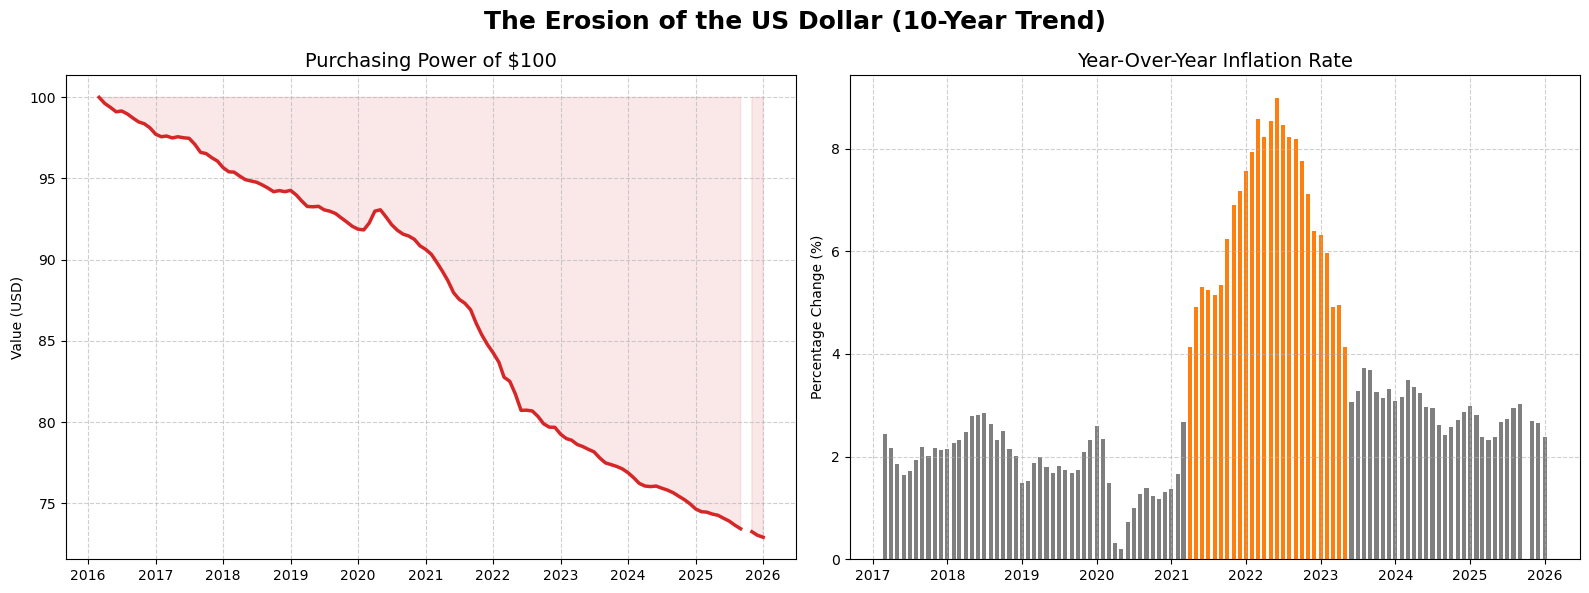

In [9]:
# All Urban Consumers
# purchasing power drop and the YoY inflation rate

import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime

# 1. Set the 10-year timeframe and fetch data from FRED
end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=10*365)
cpi_data = web.DataReader('CPIAUCSL', 'fred', start_date, end_date)

# 2. Calculate the Purchasing Power of a baseline $100
# Formula: (Base CPI / Current Month CPI) * 100
base_cpi = cpi_data['CPIAUCSL'].iloc[0]
cpi_data['Purchasing_Power'] = (base_cpi / cpi_data['CPIAUCSL']) * 100

# 3. Calculate Year-Over-Year (YoY) Inflation Rate
cpi_data['YoY_Inflation'] = cpi_data['CPIAUCSL'].pct_change(periods=12) * 100

# 4. Set up the visualization (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('The Erosion of the US Dollar (10-Year Trend)', fontsize=18, fontweight='bold')

# Plot 1: Purchasing Power Line Chart
ax1.plot(cpi_data.index, cpi_data['Purchasing_Power'], color='tab:red', linewidth=2.5)
ax1.set_title('Purchasing Power of $100', fontsize=14)
ax1.set_ylabel('Value (USD)')
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.fill_between(cpi_data.index, cpi_data['Purchasing_Power'], 100, color='tab:red', alpha=0.1)

# Plot 2: YoY Inflation Bar Chart
# Drop NAs created by the 12-month pct_change
yoy_data = cpi_data.dropna()
ax2.bar(yoy_data.index, yoy_data['YoY_Inflation'], color='tab:gray', width=20)
ax2.set_title('Year-Over-Year Inflation Rate', fontsize=14)
ax2.set_ylabel('Percentage Change (%)')
ax2.grid(True, linestyle='--', alpha=0.6)

# Highlight periods of high inflation (e.g., above 4%)
high_inflation = yoy_data[yoy_data['YoY_Inflation'] > 4]
ax2.bar(high_inflation.index, high_inflation['YoY_Inflation'], color='tab:orange', width=20)

plt.tight_layout()
plt.show()